In [22]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [23]:
data = pd.read_csv('4107-data.csv')
data

formula  temperature(K)  sum_Atomic_Number  \
0                  Cu1.7Se             295              83.30   
1                  Cu1.8Se             295              86.20   
2     Sn0.92Ge0.04As0.04Te             328             100.60   
3                     SnTe             300             102.00   
4                     SnTe             298             102.00   
...                    ...             ...                ...   
4101  Sn0.93Pb0.06Zn0.01Se             773              85.72   
4102        Mg3.5Gd0.01Sb2             700             144.64   
4103                  SnSe             673              84.00   
4104    Ca3Al0.95Zn0.05Sb3             522             226.85   
4105              TlCr5Se8             623             473.00   

      sum_Atomic_Weight  sum_Mendeleev_Number  sum_l_quantum_number  \
0            186.988200                197.80                  4.40   
1            193.342800                204.20                  4.60   
2            242.714464                170.12                  2.00   
3            246.310000                170.00                  2.00   
4            246.310000                170.00                  2.00   
...                 ...                   ...                   ...   
4101         202.446200                168.95                  2.01   
4102         330.160000                408.27                  2.03   
4103         197.670000                169.00                  2.00   
4104         514.415962                348.80                  4.05   
4105        1096.043800               1033.00                 19.00   

      sum_Atomic_Radius  sum_Covalent_Radius  sum_Pauling_Electronegativity  \
0                3.4950               3.5060                         5.7800   
1                3.6400               3.6440                         5.9700   
2                2.6596               2.7436                         4.0708   
3                2.6800               2.7600                         4.0600   
4                2.6800               2.7600                         4.0600   
...                 ...                  ...                            ...   
4101             2.4851               2.5726                         4.5015   
4102             7.7583               7.3261                         8.6970   
4103             2.4800               2.5700                         4.5100   
4104            11.0020              10.5465                        10.7620   
4105            18.1000              17.1100                        30.3200   

      sum_number_of_valence_electrons  ...  sum_Boiling_Point_(K)  \
0                               24.70  ...              5786.4050   
1                               25.80  ...              6070.4200   
2                               10.04  ...              3762.3800   
3                               10.00  ...              3806.1000   
4                               10.00  ...              3806.1000   
...                               ...  ...                    ...   
4101                            10.08  ...              3455.8600   
4102                            17.03  ...              9252.7865   
4103                            10.00  ...              3501.3000   
4104                            24.45  ...             14603.0000   
4105                            81.00  ...             24121.1000   

      sum_Density_(g/mL)  sum_specific_heat_(J/g_K)_  \
0                20.0220                     0.96600   
1                20.9180                     1.00400   
2                13.4072                     0.43484   
3                13.5500                     0.42700   
4                13.5500                     0.42700   
...                  ...                         ...   
4101             12.3436                     0.54281   
4102             19.5490                     3.99230   
4103             12.1000                     0.54700   
4104             27.6415                     3.

In [24]:
columns_to_exclude = ['formula','seebeck_coefficient' ,'Thermal_conductivity','electrical_conductivity(S/m)']
X = data.drop(columns=columns_to_exclude)
X

temperature(K)  sum_Atomic_Number  sum_Atomic_Weight  \
0                295              83.30         186.988200   
1                295              86.20         193.342800   
2                328             100.60         242.714464   
3                300             102.00         246.310000   
4                298             102.00         246.310000   
...              ...                ...                ...   
4101             773              85.72         202.446200   
4102             700             144.64         330.160000   
4103             673              84.00         197.670000   
4104             522             226.85         514.415962   
4105             623             473.00        1096.043800   

      sum_Mendeleev_Number  sum_l_quantum_number  sum_Atomic_Radius  \
0                   197.80                  4.40             3.4950   
1                   204.20                  4.60             3.6400   
2                   170.12                  2.00             2.6596   
3                   170.00                  2.00             2.6800   
4                   170.00                  2.00             2.6800   
...                    ...                   ...                ...   
4101                168.95                  2.01             2.4851   
4102                408.27                  2.03             7.7583   
4103                169.00                  2.00             2.4800   
4104                348.80                  4.05            11.0020   
4105               1033.00                 19.00            18.1000   

      sum_Covalent_Radius  sum_Pauling_Electronegativity  \
0                  3.5060                         5.7800   
1                  3.6440                         5.9700   
2                  2.7436                         4.0708   
3                  2.7600                         4.0600   
4                  2.7600                         4.0600   
...                   ...                            ...   
4101               2.5726                         4.5015   
4102               7.3261                         8.6970   
4103               2.5700                         4.5100   
4104              10.5465                        10.7620   
4105              17.1100                        30.3200   

      sum_number_of_valence_electrons  sum_1st_ionization_potential_(kJ/mol)  \
0                               24.70                                2207.50   
1                               25.80                                2282.00   
2                               10.04                                1589.64   
3                               10.00                                1578.00   
4                               10.00                                1578.00   
...                               ...                                    ...   
4101                            10.08                                1652.39   
4102                            17.03                                4256.93   
4103                            10.00                                1650.00   
4104                            24.45                                4866.40   
4105                            81.00                               11382.00   

      sum_Melting_point_(K)  sum_Boiling_Point_(K)  sum_Density_(g/mL)  \
0                 2795.6050              5786.4050             20.0220   
1                 2931.2200              6070.4200             20.9180   
2                 1279.8160              3762.3800             13.4072   
3                 1227.8000              3806.1000             13.5500   
4                 1227.8000              3806.1000             13.5500   
...                     ...                    ...                 ...   
4101              1002.9060              3455.8600             12.3436   
4102              5051.6865              9252.7865             19.5490   
4103               995.3000              3501.3000          

In [25]:
y = data['electrical_conductivity(S/m)']
y

0       979730
1       882432
2       786420
3       777885
4       768116
         ...  
4101      5082
4102      5062
4103      5061
4104      5050
4105      5010
Name: electrical_conductivity(S/m), Length: 4106, dtype: int64

In [26]:
X, y = shuffle(X, y, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

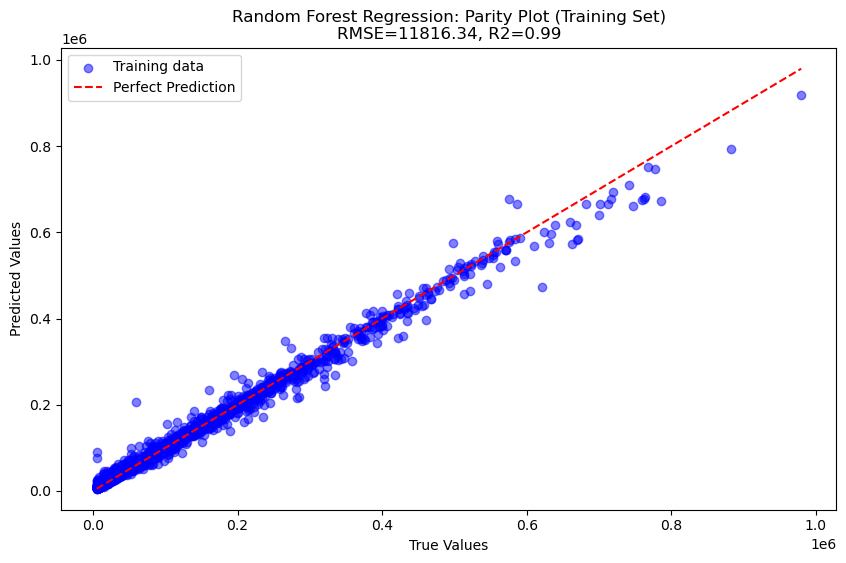

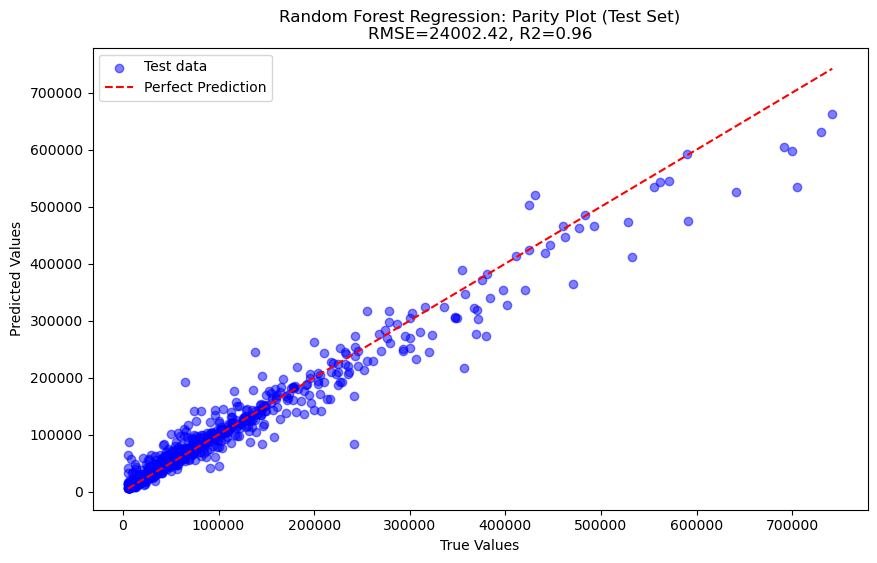

In [28]:
# Train Random Forest model
rf = RandomForestRegressor()  # You can adjust the parameters as needed
rf.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate RMSE and R2 score for both sets
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Function to plot parity plot
def plot_parity(y_true, y_pred, model_name, rmse, r2, dataset):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label=f'{dataset} data')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{model_name}: Parity Plot ({dataset} Set)\nRMSE={rmse:.2f}, R2={r2:.2f}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot parity plot for training set
plot_parity(y_train, y_train_pred_rf, f'Random Forest Regression', train_rmse_rf, train_r2_rf, 'Training')

# Plot parity plot for test set
plot_parity(y_test, y_test_pred_rf, f'Random Forest Regression', test_rmse_rf, test_r2_rf, 'Test')
